In [20]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from src.constants import PCLASS_HEADER, SEX_HEADER, SURVIVED_HEADER


titanic_training_df: DataFrame = pd.read_csv("../data/train.csv")
titanic_training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Dataset overview
print(f"Dataset contains {titanic_training_df.shape[0]} passengers with {titanic_training_df.shape[1]} features\n")

# Check for missing values in analysis columns
print("Data quality check for Sex and Survived:")
print(f"  Sex - Missing: {titanic_training_df[SEX_HEADER].isna().sum()} ({titanic_training_df[SEX_HEADER].isna().sum()/len(titanic_training_df)*100:.1f}%)")
print(f"  Survived - Missing: {titanic_training_df[SURVIVED_HEADER].isna().sum()} ({titanic_training_df[SURVIVED_HEADER].isna().sum()/len(titanic_training_df)*100:.1f}%)")

# Verify data types
print(f"\nData types:")
print(f"  Sex: {titanic_training_df[SEX_HEADER].dtype}")
print(f"  Survived: {titanic_training_df[SURVIVED_HEADER].dtype}")

Dataset contains 891 passengers with 12 features

Data quality check for Sex and Survived:
  Sex - Missing: 0 (0.0%)
  Survived - Missing: 0 (0.0%)

Data types:
  Sex: object
  Survived: int64


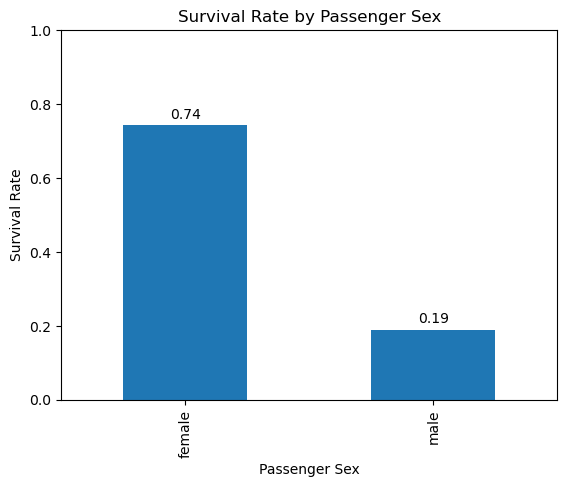

In [22]:
from matplotlib.container import BarContainer

sex_survival_df: DataFrame = titanic_training_df[[SURVIVED_HEADER, SEX_HEADER]].copy()

survival_by_sex_group = sex_survival_df.groupby(SEX_HEADER, observed=True)[SURVIVED_HEADER].mean()
survival_by_sex_bar_chart = survival_by_sex_group.plot(kind="bar")

survival_by_sex_bar_chart.set_xlabel("Passenger Sex")

survival_by_sex_bar_chart.set_ylabel("Survival Rate")
survival_by_sex_bar_chart.set_ybound(0, 1)

survival_by_sex_bar_chart.set_title("Survival Rate by Passenger Sex")

for container in survival_by_sex_bar_chart.containers:
    if isinstance(container, BarContainer):
        survival_by_sex_bar_chart.bar_label(container, fmt='%.2f', padding=3)

plt.show()

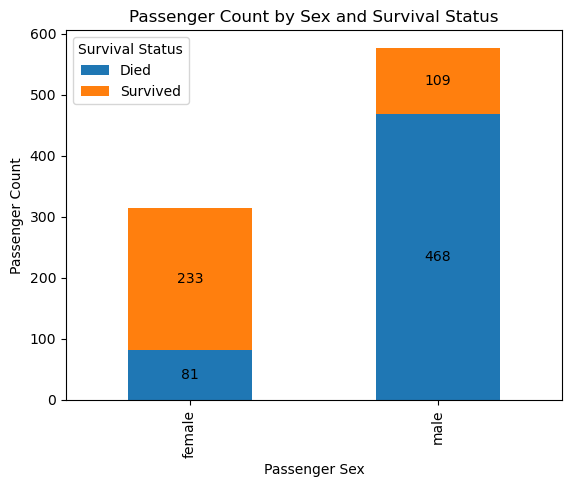

In [23]:
survival_rate_bar_chart = sex_survival_df.groupby([SEX_HEADER, SURVIVED_HEADER], observed=True).size().unstack().plot(kind='bar', stacked=True)

survival_rate_bar_chart.set_xlabel("Passenger Sex")
survival_rate_bar_chart.set_ylabel("Passenger Count")

survival_rate_bar_chart.set_title("Passenger Count by Sex and Survival Status")

# Update legend labels for clarity
survival_rate_bar_chart.legend(["Died", "Survived"], title="Survival Status")

# Add value labels to stacked bars
for container in survival_rate_bar_chart.containers:
    if isinstance(container, BarContainer):
        survival_rate_bar_chart.bar_label(container, label_type='center', fmt='%d')

plt.show()